# Individual Assignment

## 1. Importing Libraries and Datasets

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
from datetime import datetime,date

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# implementation & serving
import gradio as gr

In [2]:
raw_test_data = pd.read_csv("20220314_test_no_target.txt",sep=";",dtype={"cnae3":str})
raw_train_data = pd.read_csv("20220314_train.txt",sep=";",dtype={"cnae3":str})
cnae2009 = pd.read_excel("estructura_cnae2009.xls")

***

## Preprocessing Raw Dataset

In [3]:
raw_test_data.head()

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc
0,458072,474,COMERCIO AL POR MENOR DE EQUIPOS PARA LAS TECN...,8.0,2007.0,5,0,0,0.00,NaN,NaN,NaN
1,516331,412,CONSTRUCCION DE EDIFICIOS,28.0,1998.0,5,0,0,0.00,NaN,NaN,NaN
2,3424,681,COMPRAVENTA DE BIENES INMOBILIARIOS POR CUENTA...,8.0,1996.0,1,3,3,601225.40,NaN,NaN,NaN
3,880645,452,MANTENIMIENTO Y REPARACION DE VEHICULOS DE MOTOR,30.0,2015.0,5,0,0,0.00,NaN,NaN,NaN
4,31272,465,COMERCIO AL POR MAYOR DE EQUIPOS PARA LAS TECN...,28.0,1978.0,4,1,4,115845.06,10479.74,3.0,68.85


In [4]:
raw_train_data.head()

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,NaN,NaN,NaN,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,NaN,NaN,NaN,0
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,NaN,NaN,NaN,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,NaN,NaN,NaN,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,NaN,NaN,75.73,0


In [5]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2852 non-null   int64  
 1   cnae3       2852 non-null   object 
 2   dcnae_agr3  2852 non-null   object 
 3   provincia   2825 non-null   float64
 4   anio        2839 non-null   float64
 5   gradvinc    2852 non-null   int64  
 6   noprotra    2852 non-null   int64  
 7   noprovin    2852 non-null   int64  
 8   volneg      2852 non-null   float64
 9   fact        406 non-null    float64
 10  num_bancos  406 non-null    float64
 11  pmc         1037 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 267.5+ KB


In [6]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24921 entries, 0 to 24920
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24921 non-null  int64  
 1   cnae3       24921 non-null  object 
 2   dcnae_agr3  24914 non-null  object 
 3   provincia   24718 non-null  object 
 4   anio        24813 non-null  float64
 5   gradvinc    24921 non-null  int64  
 6   noprotra    24921 non-null  int64  
 7   noprovin    24921 non-null  int64  
 8   volneg      24921 non-null  float64
 9   fact        3614 non-null   float64
 10  num_bancos  3614 non-null   float64
 11  pmc         9095 non-null   float64
 12  target      24921 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 2.5+ MB


In [7]:
raw_test_data.describe()

,id,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc
count,2852.000000,2825.000000,2839.000000,2852.000000,2852.000000,2852.000000,2.852000e+03,4.060000e+02,406.000000,1037.000000
mean,450157.404979,25.553628,2002.448397,3.547335,1.311360,0.782959,9.031016e+04,2.527821e+04,1.822660,337.012478
std,256789.558223,13.793039,11.551249,1.617665,1.595714,1.489900,5.165273e+05,8.218500e+04,1.521234,5297.009272
min,30.000000,1.000000,1875.000000,1.000000,0.000000,0.000000,-1.063041e+04,3.691000e+01,1.000000,0.000000
25%,233622.000000,12.000000,1996.000000,2.000000,0.000000,0.000000,0.000000e+00,1.672790e+03,1.000000,15.010000
50%,449656.000000,28.000000,2004.000000,4.000000,1.000000,0.000000,6.271000e+01,6.279815e+03,1.000000,54.370000
75%,671386.000000,36.000000,2010.000000,5.000000,3.000000,1.000000,2.694367e+04,1.960625e+04,2.000000,107.940000
max,880904.000000,52.000000,2024.000000,5.000000,7.000000,10.000000,1.126630e+07,1.310750e+06,8.000000,166606.450000


In [8]:
raw_train_data.describe()

,id,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
count,24921.00000,24813.000000,24921.000000,24921.000000,24921.000000,2.492100e+04,3.614000e+03,3614.000000,9.095000e+03,24921.000000
mean,453976.78476,2002.456374,3.515228,1.349986,0.802054,8.805150e+04,2.605555e+04,1.919480,5.489077e+03,0.121905
std,261479.13431,11.482027,1.614522,1.623209,1.497464,6.482998e+05,9.288299e+04,1.632561,4.630098e+05,0.327183
min,29.00000,1896.000000,1.000000,0.000000,0.000000,-1.266810e+05,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,227368.00000,1996.000000,2.000000,0.000000,0.000000,0.000000e+00,1.709832e+03,1.000000,1.489500e+01,0.000000
50%,454349.00000,2003.000000,4.000000,1.000000,0.000000,2.392600e+02,6.789140e+03,1.000000,5.284000e+01,0.000000
75%,688863.00000,2011.000000,5.000000,3.000000,1.000000,3.112389e+04,2.158924e+04,2.000000,1.096550e+02,0.000000
max,880947.00000,2024.000000,5.000000,8.000000,13.000000,5.204917e+07,2.599505e+06,13.000000,4.412950e+07,1.000000


In [9]:
for col in raw_train_data:
    print("*************")
    print(col)
    print(raw_train_data[col].value_counts)

*************
id
<bound method IndexOpsMixin.value_counts of 0        616016
1        243724
2        637325
3        385667
4        605174
          ...  
24916    742492
24917    617487
24918    486289
24919    405081
24920    486373
Name: id, Length: 24921, dtype: int64>
*************
cnae3
<bound method IndexOpsMixin.value_counts of 0        432
1        411
2        960
3        432
4        466
        ... 
24916    411
24917    931
24918    475
24919    561
24920    862
Name: cnae3, Length: 24921, dtype: object>
*************
dcnae_agr3
<bound method IndexOpsMixin.value_counts of 0        INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...
1                                   PROMOCION INMOBILIARIA
2                               OTROS SERVICIOS PERSONALES
3        INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...
4        COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...
                               ...                        
24916                               PROMOCION INMOB

In [10]:
raw_train_data.isna().sum()

id                0
cnae3             0
dcnae_agr3        7
provincia       203
anio            108
gradvinc          0
noprotra          0
noprovin          0
volneg            0
fact          21307
num_bancos    21307
pmc           15826
target            0
dtype: int64

In [11]:
raw_test_data.isna().sum()

id               0
cnae3            0
dcnae_agr3       0
provincia       27
anio            13
gradvinc         0
noprotra         0
noprovin         0
volneg           0
fact          2446
num_bancos    2446
pmc           1815
dtype: int64

#### Dropping fact and num_bancos

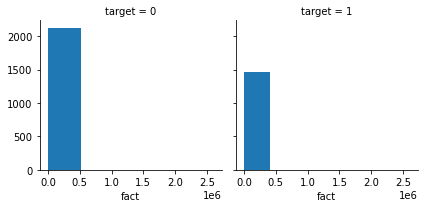

In [12]:
g = sns.FacetGrid(raw_train_data,col="target")
g.map(plt.hist,"fact",bins=5)

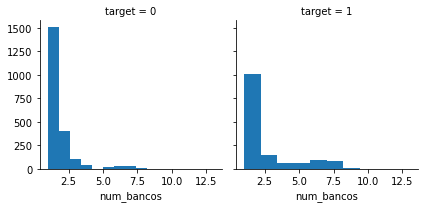

In [13]:
g = sns.FacetGrid(raw_train_data,col="target")
g.map(plt.hist,"num_bancos",bins=10)

In [14]:
raw_test_data.drop(["fact","num_bancos"],axis=1,inplace=True)
raw_train_data.drop(["fact","num_bancos"],axis=1,inplace=True)

In [15]:
raw_train_data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,NaN,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,NaN,0
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,NaN,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,NaN,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,75.73,0
...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,04,2013.0,4,1,2,97529.72,NaN,0
24917,617487,931,ACTIVIDADES DEPORTIVAS,37,2017.0,1,3,4,656367.19,7.92,0
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,01,1991.0,5,0,0,0.00,70.26,0
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,30,2008.0,4,1,0,0.00,NaN,0


In [16]:
raw_test_data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc
0,458072,474,COMERCIO AL POR MENOR DE EQUIPOS PARA LAS TECN...,8.0,2007.0,5,0,0,0.00,NaN
1,516331,412,CONSTRUCCION DE EDIFICIOS,28.0,1998.0,5,0,0,0.00,NaN
2,3424,681,COMPRAVENTA DE BIENES INMOBILIARIOS POR CUENTA...,8.0,1996.0,1,3,3,601225.40,NaN
3,880645,452,MANTENIMIENTO Y REPARACION DE VEHICULOS DE MOTOR,30.0,2015.0,5,0,0,0.00,NaN
4,31272,465,COMERCIO AL POR MAYOR DE EQUIPOS PARA LAS TECN...,28.0,1978.0,4,1,4,115845.06,68.85
...,...,...,...,...,...,...,...,...,...,...
2847,458428,960,OTROS SERVICIOS PERSONALES,23.0,1994.0,5,0,0,0.00,NaN
2848,192154,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,46.0,1998.0,4,1,1,410332.50,41.47
2849,213202,310,FABRICACION DE MUEBLES,46.0,2004.0,5,0,0,0.00,NaN
2850,776938,411,PROMOCION INMOBILIARIA,17.0,2001.0,5,0,0,90.77,NaN


#### provincia: cleaning up column and changing provincia to comunidad for dimensionality reduction in one-hot encoding

In [17]:
raw_train_data[raw_train_data["provincia"].isna()==True]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
113,256288,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,1996.0,5,0,0,0.00,NaN,0
141,533267,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,2006.0,5,0,0,0.00,NaN,0
232,857413,494,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVI...,NaN,2010.0,5,0,0,0.00,NaN,0
322,414463,620,PROGRAMACION. CONSULTORIA Y OTRAS ACTIVIDADES ...,NaN,2001.0,5,0,0,0.00,NaN,0
397,475422,462,COMERCIO AL POR MAYOR DE MATERIAS PRIMAS AGRAR...,NaN,2004.0,4,0,0,2894.35,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
24423,434903,015,PRODUCCION AGRICOLA COMBINADA CON PRODUCCION G...,NaN,1994.0,5,0,0,0.00,NaN,0
24458,132371,467,OTRO COMERCIO AL POR MAYOR ESPECIALIZADO,NaN,1989.0,4,2,4,332786.67,NaN,0
24774,764013,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,NaN,2009.0,1,2,1,183176.47,NaN,0
24867,394706,411,PROMOCION INMOBILIARIA,NaN,2001.0,5,0,0,0.00,NaN,0


In [18]:
raw_train_data.shape

(24921, 11)

In [19]:
#dropping rows with NaN for provincia
raw_train_data = raw_train_data[raw_train_data["provincia"].notna()]
raw_test_data = raw_test_data[raw_test_data["provincia"].notna()]

raw_train_data[raw_train_data["provincia"].isna()==True]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target


In [20]:
raw_train_data.shape

(24718, 11)

In [21]:
#changing provincia column type in testset to have same types for test and training set
raw_test_data["provincia"] = raw_test_data["provincia"].astype(int).astype(str)
type(raw_test_data["provincia"][0])

C:\Users\thaer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


str

In [22]:
#wrong province indeces spotted (**,00) which will be replace with Madrid (28)
raw_train_data.groupby("provincia").id.nunique()

provincia
**       4
00       3
01     128
02     207
03    1003
04     298
05      70
06     270
07     603
08    2863
09     115
10     164
11     440
12     291
13     216
14     412
15     710
16      80
17     416
18     366
19      86
20     258
21     223
22     126
23     205
24     259
25     255
26     156
27     181
28    4907
29     971
30     585
31     256
32     166
33     381
34      72
35     619
36     591
37     166
38     526
39     339
40      67
41    1146
42      43
43     292
44      62
45     380
46    1344
47     321
48     486
49      53
50     484
51      15
52      38
Name: id, dtype: int64

In [23]:
raw_test_data.groupby("provincia").id.nunique()

provincia
1      16
10     20
11     48
12     26
13     20
14     52
15     73
16     11
17     42
18     34
19      9
2      14
20     28
21     30
22     10
23     34
24     28
25     21
26     17
27     23
28    560
29     99
3      94
30     80
31     37
32     22
33     59
34      7
35     81
36     64
37     14
38     69
39     46
4      46
40      8
41    121
42      4
43     24
44      6
45     47
46    165
47     31
48     47
49      6
5       5
50     58
51      3
52      5
6      32
7      60
8     357
9      12
Name: id, dtype: int64

In [24]:
type(raw_test_data["provincia"][0])

str

In [25]:
raw_train_data[raw_train_data["provincia"]=="00"]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
15685,101226,749,OTRAS ACTIVIDADES PROFESIONALES. CIENTIFICAS Y...,00,1994.0,5,0,0,0.0,NaN,0
20037,195165,960,OTROS SERVICIOS PERSONALES,00,1997.0,5,0,0,0.0,NaN,0
22664,100268,702,ACTIVIDADES DE CONSULTORIA DE GESTION EMPRESARIAL,00,1992.0,5,0,0,0.0,NaN,0


In [26]:
raw_train_data[raw_train_data["provincia"]=="**"]

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
3764,684244,477,COMERCIO AL POR MENOR DE OTROS ARTICULOS EN ES...,**,2013.0,5,0,0,0.0,NaN,0
8513,453821,522,ACTIVIDADES ANEXAS AL TRANSPORTE,**,2004.0,5,0,0,0.0,NaN,0
10283,55693,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,**,1997.0,5,0,0,0.0,NaN,0
14246,89926,692,ACTIVIDADES DE CONTABILIDAD. TENEDURIA DE LIBR...,**,2001.0,5,0,0,0.0,NaN,0


In [27]:
raw_test_data[raw_test_data["provincia"]=="00"]
raw_train_data[raw_train_data["provincia"]=="**"]
#no results found

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
3764,684244,477,COMERCIO AL POR MENOR DE OTROS ARTICULOS EN ES...,**,2013.0,5,0,0,0.0,NaN,0
8513,453821,522,ACTIVIDADES ANEXAS AL TRANSPORTE,**,2004.0,5,0,0,0.0,NaN,0
10283,55693,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,**,1997.0,5,0,0,0.0,NaN,0
14246,89926,692,ACTIVIDADES DE CONTABILIDAD. TENEDURIA DE LIBR...,**,2001.0,5,0,0,0.0,NaN,0


In [28]:
raw_train_data["provincia"].replace("00","28",inplace=True)
raw_train_data["provincia"].replace("**","28",inplace=True)
raw_test_data["provincia"].replace("00","28",inplace=True)
raw_test_data["provincia"].replace("**","28",inplace=True)

C:\Users\thaer\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
raw_train_data.groupby("provincia").id.nunique()

provincia
01     128
02     207
03    1003
04     298
05      70
06     270
07     603
08    2863
09     115
10     164
11     440
12     291
13     216
14     412
15     710
16      80
17     416
18     366
19      86
20     258
21     223
22     126
23     205
24     259
25     255
26     156
27     181
28    4914
29     971
30     585
31     256
32     166
33     381
34      72
35     619
36     591
37     166
38     526
39     339
40      67
41    1146
42      43
43     292
44      62
45     380
46    1344
47     321
48     486
49      53
50     484
51      15
52      38
Name: id, dtype: int64

In [30]:
#grouping provincias to comunidades for train data
raw_train_data["provincia"].replace(["04","11","14","18","21","23","29","41"],"Andalucia",inplace=True)
raw_train_data["provincia"].replace(["22","44","50"],"Aragon",inplace=True)
raw_train_data["provincia"].replace(["33"],"Asturias",inplace=True)
raw_train_data["provincia"].replace(["07"],"Baleares",inplace=True)
raw_train_data["provincia"].replace(["35","38"],"Canarias",inplace=True)
raw_train_data["provincia"].replace(["39"],"Cantabria",inplace=True)
raw_train_data["provincia"].replace(["05","09","24","34","37","40","42","47","49"],"CastillaLeon",inplace=True)
raw_train_data["provincia"].replace(["02","13","16","19","45"],"CastillaLaMancha",inplace=True)
raw_train_data["provincia"].replace(["08","17","25","43"],"Cataluna",inplace=True)
raw_train_data["provincia"].replace(["03","12","46"],"Valencia",inplace=True)
raw_train_data["provincia"].replace(["06","10"],"Extremadura",inplace=True)
raw_train_data["provincia"].replace(["15","27","32","36"],"Galicia",inplace=True)
raw_train_data["provincia"].replace(["28"],"Madrid",inplace=True)
raw_train_data["provincia"].replace(["30"],"Murcia",inplace=True)
raw_train_data["provincia"].replace(["31"],"Navarra",inplace=True)
raw_train_data["provincia"].replace(["01","48","20"],"PaisVasco",inplace=True)
raw_train_data["provincia"].replace(["26"],"LaRioja",inplace=True)
raw_train_data["provincia"].replace(["51","52"],"CeutaMelilla",inplace=True)

In [31]:
#grouping provincias to comunidades for test data
raw_test_data["provincia"].replace(["4","11","14","18","21","23","29","41"],"Andalucia",inplace=True)
raw_test_data["provincia"].replace(["22","44","50"],"Aragon",inplace=True)
raw_test_data["provincia"].replace(["33"],"Asturias",inplace=True)
raw_test_data["provincia"].replace(["7"],"Baleares",inplace=True)
raw_test_data["provincia"].replace(["35","38"],"Canarias",inplace=True)
raw_test_data["provincia"].replace(["39"],"Cantabria",inplace=True)
raw_test_data["provincia"].replace(["5","9","24","34","37","40","42","47","49"],"CastillaLeon",inplace=True)
raw_test_data["provincia"].replace(["2","13","16","19","45"],"CastillaLaMancha",inplace=True)
raw_test_data["provincia"].replace(["8","17","25","43"],"Cataluna",inplace=True)
raw_test_data["provincia"].replace(["3","12","46"],"Valencia",inplace=True)
raw_test_data["provincia"].replace(["6","10"],"Extremadura",inplace=True)
raw_test_data["provincia"].replace(["15","27","32","36"],"Galicia",inplace=True)
raw_test_data["provincia"].replace(["28"],"Madrid",inplace=True)
raw_test_data["provincia"].replace(["30"],"Murcia",inplace=True)
raw_test_data["provincia"].replace(["31"],"Navarra",inplace=True)
raw_test_data["provincia"].replace(["1","48","20"],"PaisVasco",inplace=True)
raw_test_data["provincia"].replace(["26"],"LaRioja",inplace=True)
raw_test_data["provincia"].replace(["51","52"],"CeutaMelilla",inplace=True)

In [32]:
raw_train_data.groupby("provincia").id.nunique()

provincia
Andalucia           4061
Aragon               672
Asturias             381
Baleares             603
Canarias            1145
Cantabria            339
CastillaLaMancha     969
CastillaLeon        1166
Cataluna            3826
CeutaMelilla          53
Extremadura          434
Galicia             1648
LaRioja              156
Madrid              4914
Murcia               585
Navarra              256
PaisVasco            872
Valencia            2638
Name: id, dtype: int64

In [33]:
raw_test_data.groupby("provincia").id.nunique()

provincia
Andalucia           464
Aragon               74
Asturias             59
Baleares             60
Canarias            150
Cantabria            46
CastillaLaMancha    101
CastillaLeon        115
Cataluna            444
CeutaMelilla          8
Extremadura          52
Galicia             182
LaRioja              17
Madrid              560
Murcia               80
Navarra              37
PaisVasco            91
Valencia            285
Name: id, dtype: int64

In [34]:
#dropping rows with CeutaMelilla for provincia
raw_train_data = raw_train_data[raw_train_data["provincia"]!="CeutaMelilla"]
raw_test_data = raw_test_data[raw_test_data["provincia"]!="CeutaMelilla"]

In [35]:
raw_test_data.groupby("provincia").id.nunique()

provincia
Andalucia           464
Aragon               74
Asturias             59
Baleares             60
Canarias            150
Cantabria            46
CastillaLaMancha    101
CastillaLeon        115
Cataluna            444
Extremadura          52
Galicia             182
LaRioja              17
Madrid              560
Murcia               80
Navarra              37
PaisVasco            91
Valencia            285
Name: id, dtype: int64

In [36]:
raw_train_data

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,pmc,target
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,Madrid,2016.0,1,4,4,86062.25,NaN,1
1,243724,411,PROMOCION INMOBILIARIA,Madrid,1992.0,5,0,0,0.00,NaN,0
2,637325,960,OTROS SERVICIOS PERSONALES,Asturias,2018.0,5,0,0,0.00,NaN,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,Canarias,2004.0,1,4,4,174966.92,NaN,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,Aragon,2013.0,5,0,0,0.00,75.73,0
...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,Andalucia,2013.0,4,1,2,97529.72,NaN,0
24917,617487,931,ACTIVIDADES DEPORTIVAS,CastillaLeon,2017.0,1,3,4,656367.19,7.92,0
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,PaisVasco,1991.0,5,0,0,0.00,70.26,0
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,Murcia,2008.0,4,1,0,0.00,NaN,0


In [37]:
#Performing one-hot encoding on the feature provincia for train dataset
train_comunidades = pd.get_dummies(raw_train_data["provincia"],drop_first=True)
train_comunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24665 entries, 0 to 24920
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Aragon            24665 non-null  uint8
 1   Asturias          24665 non-null  uint8
 2   Baleares          24665 non-null  uint8
 3   Canarias          24665 non-null  uint8
 4   Cantabria         24665 non-null  uint8
 5   CastillaLaMancha  24665 non-null  uint8
 6   CastillaLeon      24665 non-null  uint8
 7   Cataluna          24665 non-null  uint8
 8   Extremadura       24665 non-null  uint8
 9   Galicia           24665 non-null  uint8
 10  LaRioja           24665 non-null  uint8
 11  Madrid            24665 non-null  uint8
 12  Murcia            24665 non-null  uint8
 13  Navarra           24665 non-null  uint8
 14  PaisVasco         24665 non-null  uint8
 15  Valencia          24665 non-null  uint8
dtypes: uint8(16)
memory usage: 578.1 KB


In [38]:
#Performing one-hot encoding on the feature provincia for test dataset
test_comunidades = pd.get_dummies(raw_test_data["provincia"],drop_first=True)
test_comunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Aragon            2817 non-null   uint8
 1   Asturias          2817 non-null   uint8
 2   Baleares          2817 non-null   uint8
 3   Canarias          2817 non-null   uint8
 4   Cantabria         2817 non-null   uint8
 5   CastillaLaMancha  2817 non-null   uint8
 6   CastillaLeon      2817 non-null   uint8
 7   Cataluna          2817 non-null   uint8
 8   Extremadura       2817 non-null   uint8
 9   Galicia           2817 non-null   uint8
 10  LaRioja           2817 non-null   uint8
 11  Madrid            2817 non-null   uint8
 12  Murcia            2817 non-null   uint8
 13  Navarra           2817 non-null   uint8
 14  PaisVasco         2817 non-null   uint8
 15  Valencia          2817 non-null   uint8
dtypes: uint8(16)
memory usage: 66.0 KB


In [39]:
#Joining the dummy dataset for comunidades and the train dataset
raw_train_data = pd.concat([raw_train_data, train_comunidades], axis=1)
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24665 entries, 0 to 24920
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                24665 non-null  int64  
 1   cnae3             24665 non-null  object 
 2   dcnae_agr3        24659 non-null  object 
 3   provincia         24665 non-null  object 
 4   anio              24576 non-null  float64
 5   gradvinc          24665 non-null  int64  
 6   noprotra          24665 non-null  int64  
 7   noprovin          24665 non-null  int64  
 8   volneg            24665 non-null  float64
 9   pmc               9077 non-null   float64
 10  target            24665 non-null  int64  
 11  Aragon            24665 non-null  uint8  
 12  Asturias          24665 non-null  uint8  
 13  Baleares          24665 non-null  uint8  
 14  Canarias          24665 non-null  uint8  
 15  Cantabria         24665 non-null  uint8  
 16  CastillaLaMancha  24665 non-null  uint8 

In [40]:
#Joining the dummy dataset for comunidades and the test dataset
raw_test_data = pd.concat([raw_test_data, test_comunidades], axis=1)
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2817 non-null   int64  
 1   cnae3             2817 non-null   object 
 2   dcnae_agr3        2817 non-null   object 
 3   provincia         2817 non-null   object 
 4   anio              2804 non-null   float64
 5   gradvinc          2817 non-null   int64  
 6   noprotra          2817 non-null   int64  
 7   noprovin          2817 non-null   int64  
 8   volneg            2817 non-null   float64
 9   pmc               1034 non-null   float64
 10  Aragon            2817 non-null   uint8  
 11  Asturias          2817 non-null   uint8  
 12  Baleares          2817 non-null   uint8  
 13  Canarias          2817 non-null   uint8  
 14  Cantabria         2817 non-null   uint8  
 15  CastillaLaMancha  2817 non-null   uint8  
 16  CastillaLeon      2817 non-null   uint8  


In [41]:
raw_train_data.drop("provincia",axis=1,inplace=True)
raw_test_data.drop("provincia",axis=1,inplace=True)

In [42]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2817 non-null   int64  
 1   cnae3             2817 non-null   object 
 2   dcnae_agr3        2817 non-null   object 
 3   anio              2804 non-null   float64
 4   gradvinc          2817 non-null   int64  
 5   noprotra          2817 non-null   int64  
 6   noprovin          2817 non-null   int64  
 7   volneg            2817 non-null   float64
 8   pmc               1034 non-null   float64
 9   Aragon            2817 non-null   uint8  
 10  Asturias          2817 non-null   uint8  
 11  Baleares          2817 non-null   uint8  
 12  Canarias          2817 non-null   uint8  
 13  Cantabria         2817 non-null   uint8  
 14  CastillaLaMancha  2817 non-null   uint8  
 15  CastillaLeon      2817 non-null   uint8  
 16  Cataluna          2817 non-null   uint8  


#### anio: filling NaN values with mean and chaging to years active

In [43]:
raw_train_data[raw_train_data["anio"].isna()==True]

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,target,...,CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia
124,89317,854,EDUCACION POSTSECUNDARIA,NaN,2,3,0,21129.16,NaN,0,...,0,0,0,0,0,0,0,0,0,0
593,76031,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,NaN,5,0,0,0.00,NaN,0,...,1,0,0,0,0,0,0,0,0,0
1083,69935,012,CULTIVOS PERENNES,NaN,2,4,0,1291.07,NaN,1,...,0,0,0,0,0,1,0,0,0,0
1136,571825,749,OTRAS ACTIVIDADES PROFESIONALES. CIENTIFICAS Y...,NaN,4,0,3,40094.16,46.41,0,...,0,0,0,0,0,0,0,0,1,0
1195,88568,451,VENTA DE VEHICULOS DE MOTOR,NaN,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23739,581722,471,COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO E...,NaN,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,0
23781,580613,949,OTRAS ACTIVIDADES ASOCIATIVAS,NaN,2,3,0,87365.96,NaN,0,...,0,0,0,0,0,1,0,0,0,0
23869,480511,411,PROMOCION INMOBILIARIA,NaN,5,0,0,0.00,NaN,0,...,0,1,0,0,0,0,0,0,0,0
24298,582037,011,CULTIVOS NO PERENNES,NaN,2,2,0,14030.29,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
raw_train_data["anio"].fillna(2002,inplace=True)
raw_train_data[raw_train_data["anio"].isna()==True]

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,target,...,CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia


In [45]:
raw_test_data[raw_test_data["anio"].isna()==True]

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,Aragon,...,CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia
24,580298,949,OTRAS ACTIVIDADES ASOCIATIVAS,NaN,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,0
310,208643,732,ESTUDIOS DE MERCADO Y REALIZACION DE ENCUESTAS...,NaN,4,0,0,15030.44,NaN,0,...,0,0,0,0,0,0,0,0,0,0
536,489531,851,EDUCACION PREPRIMARIA,NaN,2,4,0,6403.34,0.22,0,...,0,0,0,0,0,1,0,0,0,0
624,762736,829,ACTIVIDADES DE APOYO A LAS EMPRESAS,NaN,4,0,0,1708.94,NaN,0,...,0,0,0,0,0,1,0,0,0,0
1181,762683,257,FABRICACION DE ARTICULOS DE CUCHILLERIA Y CUBE...,NaN,4,0,0,43859.85,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1320,482159,162,FABRICACION DE PRODUCTOS DE MADERA. CORCHO. CE...,NaN,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,1
1331,483906,411,PROMOCION INMOBILIARIA,NaN,5,0,0,842.69,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1343,581387,12,CULTIVOS PERENNES,NaN,5,0,0,450.84,NaN,0,...,0,0,0,0,0,0,0,0,0,1
1524,595181,949,OTRAS ACTIVIDADES ASOCIATIVAS,NaN,5,0,0,0.00,NaN,0,...,1,0,0,0,0,0,0,0,0,0
1645,582009,477,COMERCIO AL POR MENOR DE OTROS ARTICULOS EN ES...,NaN,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
raw_test_data["anio"].fillna(2002,inplace=True)
raw_test_data[raw_test_data["anio"].isna()==True]

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,Aragon,...,CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia


In [47]:
raw_train_data

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,target,...,CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,2016.0,1,4,4,86062.25,NaN,1,...,0,0,0,0,0,1,0,0,0,0
1,243724,411,PROMOCION INMOBILIARIA,1992.0,5,0,0,0.00,NaN,0,...,0,0,0,0,0,1,0,0,0,0
2,637325,960,OTROS SERVICIOS PERSONALES,2018.0,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,2004.0,1,4,4,174966.92,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,2013.0,5,0,0,0.00,75.73,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,2013.0,4,1,2,97529.72,NaN,0,...,0,0,0,0,0,0,0,0,0,0
24917,617487,931,ACTIVIDADES DEPORTIVAS,2017.0,1,3,4,656367.19,7.92,0,...,1,0,0,0,0,0,0,0,0,0
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,1991.0,5,0,0,0.00,70.26,0,...,0,0,0,0,0,0,0,0,1,0
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,2008.0,4,1,0,0.00,NaN,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#converting the float to datetime format
raw_test_data["anio"] = pd.to_datetime(raw_test_data["anio"],format="%Y")
raw_train_data["anio"] = pd.to_datetime(raw_train_data["anio"],format="%Y")

type(raw_train_data["anio"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
def years_active(founded):
    """function converts anio founding date to years active"""
    founded = datetime.date(founded)
    today = date.today()
    return today.year - founded.year

In [50]:
raw_train_data["years_active"] = raw_train_data["anio"].apply(years_active)
raw_train_data

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,target,...,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia,years_active
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,2016-01-01,1,4,4,86062.25,NaN,1,...,0,0,0,0,1,0,0,0,0,6
1,243724,411,PROMOCION INMOBILIARIA,1992-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,1,0,0,0,0,30
2,637325,960,OTROS SERVICIOS PERSONALES,2018-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,4
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,2004-01-01,1,4,4,174966.92,NaN,0,...,0,0,0,0,0,0,0,0,0,18
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,2013-01-01,5,0,0,0.00,75.73,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,2013-01-01,4,1,2,97529.72,NaN,0,...,0,0,0,0,0,0,0,0,0,9
24917,617487,931,ACTIVIDADES DEPORTIVAS,2017-01-01,1,3,4,656367.19,7.92,0,...,0,0,0,0,0,0,0,0,0,5
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,1991-01-01,5,0,0,0.00,70.26,0,...,0,0,0,0,0,0,0,1,0,31
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,2008-01-01,4,1,0,0.00,NaN,0,...,0,0,0,0,0,1,0,0,0,14


In [51]:
raw_test_data["years_active"] = raw_test_data["anio"].apply(years_active)
raw_test_data

,id,cnae3,dcnae_agr3,anio,gradvinc,noprotra,noprovin,volneg,pmc,Aragon,...,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia,years_active
0,458072,474,COMERCIO AL POR MENOR DE EQUIPOS PARA LAS TECN...,2007-01-01,5,0,0,0.00,NaN,0,...,1,0,0,0,0,0,0,0,0,15
1,516331,412,CONSTRUCCION DE EDIFICIOS,1998-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,1,0,0,0,0,24
2,3424,681,COMPRAVENTA DE BIENES INMOBILIARIOS POR CUENTA...,1996-01-01,1,3,3,601225.40,NaN,0,...,1,0,0,0,0,0,0,0,0,26
3,880645,452,MANTENIMIENTO Y REPARACION DE VEHICULOS DE MOTOR,2015-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,0,1,0,0,0,7
4,31272,465,COMERCIO AL POR MAYOR DE EQUIPOS PARA LAS TECN...,1978-01-01,4,1,4,115845.06,68.85,0,...,0,0,0,0,1,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,458428,960,OTROS SERVICIOS PERSONALES,1994-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,0,28
2848,192154,683,ACTIVIDADES INMOBILIARIAS POR CUENTA DE TERCEROS,1998-01-01,4,1,1,410332.50,41.47,0,...,0,0,0,0,0,0,0,0,1,24
2849,213202,310,FABRICACION DE MUEBLES,2004-01-01,5,0,0,0.00,NaN,0,...,0,0,0,0,0,0,0,0,1,18
2850,776938,411,PROMOCION INMOBILIARIA,2001-01-01,5,0,0,90.77,NaN,0,...,1,0,0,0,0,0,0,0,0,21


In [52]:
type(raw_train_data["years_active"][0])

numpy.int64

In [53]:
# dropping anio from dataset
raw_train_data.drop("anio",axis=1,inplace=True)
raw_test_data.drop("anio",axis=1,inplace=True)

raw_train_data

,id,cnae3,dcnae_agr3,gradvinc,noprotra,noprovin,volneg,pmc,target,Aragon,...,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia,years_active
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,1,4,4,86062.25,NaN,1,0,...,0,0,0,0,1,0,0,0,0,6
1,243724,411,PROMOCION INMOBILIARIA,5,0,0,0.00,NaN,0,0,...,0,0,0,0,1,0,0,0,0,30
2,637325,960,OTROS SERVICIOS PERSONALES,5,0,0,0.00,NaN,0,0,...,0,0,0,0,0,0,0,0,0,4
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,1,4,4,174966.92,NaN,0,0,...,0,0,0,0,0,0,0,0,0,18
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,5,0,0,0.00,75.73,0,1,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,4,1,2,97529.72,NaN,0,0,...,0,0,0,0,0,0,0,0,0,9
24917,617487,931,ACTIVIDADES DEPORTIVAS,1,3,4,656367.19,7.92,0,0,...,0,0,0,0,0,0,0,0,0,5
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,5,0,0,0.00,70.26,0,0,...,0,0,0,0,0,0,0,1,0,31
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,4,1,0,0.00,NaN,0,0,...,0,0,0,0,0,1,0,0,0,14


In [54]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24665 entries, 0 to 24920
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                24665 non-null  int64  
 1   cnae3             24665 non-null  object 
 2   dcnae_agr3        24659 non-null  object 
 3   gradvinc          24665 non-null  int64  
 4   noprotra          24665 non-null  int64  
 5   noprovin          24665 non-null  int64  
 6   volneg            24665 non-null  float64
 7   pmc               9077 non-null   float64
 8   target            24665 non-null  int64  
 9   Aragon            24665 non-null  uint8  
 10  Asturias          24665 non-null  uint8  
 11  Baleares          24665 non-null  uint8  
 12  Canarias          24665 non-null  uint8  
 13  Cantabria         24665 non-null  uint8  
 14  CastillaLaMancha  24665 non-null  uint8  
 15  CastillaLeon      24665 non-null  uint8  
 16  Cataluna          24665 non-null  uint8 

In [55]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2817 non-null   int64  
 1   cnae3             2817 non-null   object 
 2   dcnae_agr3        2817 non-null   object 
 3   gradvinc          2817 non-null   int64  
 4   noprotra          2817 non-null   int64  
 5   noprovin          2817 non-null   int64  
 6   volneg            2817 non-null   float64
 7   pmc               1034 non-null   float64
 8   Aragon            2817 non-null   uint8  
 9   Asturias          2817 non-null   uint8  
 10  Baleares          2817 non-null   uint8  
 11  Canarias          2817 non-null   uint8  
 12  Cantabria         2817 non-null   uint8  
 13  CastillaLaMancha  2817 non-null   uint8  
 14  CastillaLeon      2817 non-null   uint8  
 15  Cataluna          2817 non-null   uint8  
 16  Extremadura       2817 non-null   uint8  


In [56]:
# saving datasets after first preprocessing stage
train_preprocessed1 = raw_train_data.copy()
test_preprocessed1 = raw_test_data.copy()

In [57]:
train_preprocessed1

,id,cnae3,dcnae_agr3,gradvinc,noprotra,noprovin,volneg,pmc,target,Aragon,...,Cataluna,Extremadura,Galicia,LaRioja,Madrid,Murcia,Navarra,PaisVasco,Valencia,years_active
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,1,4,4,86062.25,NaN,1,0,...,0,0,0,0,1,0,0,0,0,6
1,243724,411,PROMOCION INMOBILIARIA,5,0,0,0.00,NaN,0,0,...,0,0,0,0,1,0,0,0,0,30
2,637325,960,OTROS SERVICIOS PERSONALES,5,0,0,0.00,NaN,0,0,...,0,0,0,0,0,0,0,0,0,4
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,1,4,4,174966.92,NaN,0,0,...,0,0,0,0,0,0,0,0,0,18
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,5,0,0,0.00,75.73,0,1,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,742492,411,PROMOCION INMOBILIARIA,4,1,2,97529.72,NaN,0,0,...,0,0,0,0,0,0,0,0,0,9
24917,617487,931,ACTIVIDADES DEPORTIVAS,1,3,4,656367.19,7.92,0,0,...,0,0,0,0,0,0,0,0,0,5
24918,486289,475,COMERCIO AL POR MENOR DE OTROS ARTICULOS DE US...,5,0,0,0.00,70.26,0,0,...,0,0,0,0,0,0,0,1,0,31
24919,405081,561,RESTAURANTES Y PUESTOS DE COMIDAS,4,1,0,0.00,NaN,0,0,...,0,0,0,0,0,1,0,0,0,14


#### cnae:

Using official categories to transform micro groups and divisons to macro sections. This will help to extract less feature from the categories.

In [58]:
train_preprocessed1.groupby("cnae3").id.nunique()

cnae3
009      6
011    240
012    150
013      2
014    210
      ... 
951     21
952     86
960    521
970      1
990      1
Name: id, Length: 255, dtype: int64

In [59]:
cnae2009

,COD_CNAE2009,CODINTEGR,TITULO_CNAE2009
0,A,A,"Agricultura, ganadería, silvicultura y pesca"
1,01,A01,"Agricultura, ganadería, caza y servicios relac..."
2,011,A011,Cultivos no perennes
3,0111,A0111,"Cultivo de cereales (excepto arroz), leguminos..."
4,0112,A0112,Cultivo de arroz
...,...,...,...
1005,9820,T9820,Actividades de los hogares como productores de...
1006,U,U,Actividades de organizaciones y organismos ext...
1007,99,U99,Actividades de organizaciones y organismos ext...
1008,990,U990,Actividades de organizaciones y organismos ext...


In [60]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Agriculture = cnae2009[cnae2009["CODINTEGR"].str[:1]=="A"]
Agriculture.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Agriculture = Agriculture[Agriculture["COD_CNAE2009"]!="A"]
Agriculture = Agriculture["COD_CNAE2009"].to_list()
Agriculture

C:\Users\thaer\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['01',
 '011',
 '0111',
 '0112',
 '0113',
 '0114',
 '0115',
 '0116',
 '0119',
 '012',
 '0121',
 '0122',
 '0123',
 '0124',
 '0125',
 '0126',
 '0127',
 '0128',
 '0129',
 '013',
 '0130',
 '014',
 '0141',
 '0142',
 '0143',
 '0144',
 '0145',
 '0146',
 '0147',
 '0149',
 '015',
 '0150',
 '016',
 '0161',
 '0162',
 '0163',
 '0164',
 '017',
 '0170',
 '02',
 '021',
 '0210',
 '022',
 '0220',
 '023',
 '0230',
 '024',
 '0240',
 '03',
 '031',
 '0311',
 '0312',
 '032',
 '0321',
 '0322']

In [61]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Mining = cnae2009[cnae2009["CODINTEGR"].str[:1]=="B"]
Mining.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Mining = Mining[Mining["COD_CNAE2009"]!="B"]
Mining = Mining["COD_CNAE2009"].to_list()
Mining

['05',
 '051',
 '0510',
 '052',
 '0520',
 '06',
 '061',
 '0610',
 '062',
 '0620',
 '07',
 '071',
 '0710',
 '072',
 '0721',
 '0729',
 '08',
 '081',
 '0811',
 '0812',
 '089',
 '0891',
 '0892',
 '0893',
 '0899',
 '09',
 '091',
 '0910',
 '099',
 '0990']

In [62]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Manufacturing = cnae2009[cnae2009["CODINTEGR"].str[:1]=="C"]
Manufacturing.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Manufacturing = Manufacturing[Manufacturing["COD_CNAE2009"]!="C"]
Manufacturing = Manufacturing["COD_CNAE2009"].to_list()
Manufacturing

['10',
 '101',
 '1011',
 '1012',
 '1013',
 '102',
 '1021',
 '1022',
 '103',
 '1031',
 '1032',
 '1039',
 '104',
 '1042',
 '1043',
 '1044',
 '105',
 '1052',
 '1053',
 '1054',
 '106',
 '1061',
 '1062',
 '107',
 '1071',
 '1072',
 '1073',
 '108',
 '1081',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1089',
 '109',
 '1091',
 '1092',
 '11',
 '110',
 '1101',
 '1102',
 '1103',
 '1104',
 '1105',
 '1106',
 '1107',
 '12',
 '120',
 '1200',
 '13',
 '131',
 '1310',
 '132',
 '1320',
 '133',
 '1330',
 '139',
 '1391',
 '1392',
 '1393',
 '1394',
 '1395',
 '1396',
 '1399',
 '14',
 '141',
 '1411',
 '1412',
 '1413',
 '1414',
 '1419',
 '142',
 '1420',
 '143',
 '1431',
 '1439',
 '15',
 '151',
 '1511',
 '1512',
 '152',
 '1520',
 '16',
 '161',
 '1610',
 '162',
 '1621',
 '1622',
 '1623',
 '1624',
 '1629',
 '17',
 '171',
 '1711',
 '1712',
 '172',
 '1721',
 '1722',
 '1723',
 '1724',
 '1729',
 '18',
 '181',
 '1811',
 '1812',
 '1813',
 '1814',
 '182',
 '1820',
 '19',
 '191',
 '1910',
 '192',
 '1920',
 '20',
 '201'

In [63]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Energy = cnae2009[cnae2009["CODINTEGR"].str[:1]=="D"]
Energy.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Energy = Energy[Energy["COD_CNAE2009"]!="D"]
Energy = Energy["COD_CNAE2009"].to_list()
Energy

['35',
 '351',
 '3512',
 '3513',
 '3514',
 '3515',
 '3516',
 '3517',
 '3518',
 '3519',
 '352',
 '3521',
 '3522',
 '3523',
 '353',
 '3530']

In [64]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Water = cnae2009[cnae2009["CODINTEGR"].str[:1]=="E"]
Water.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Water = Water[Water["COD_CNAE2009"]!="E"]
Water = Water["COD_CNAE2009"].to_list()
Water

['36',
 '360',
 '3600',
 '37',
 '370',
 '3700',
 '38',
 '381',
 '3811',
 '3812',
 '382',
 '3821',
 '3822',
 '383',
 '3831',
 '3832',
 '39',
 '390',
 '3900']

In [65]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Construction = cnae2009[cnae2009["CODINTEGR"].str[:1]=="F"]
Construction.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Construction = Construction[Construction["COD_CNAE2009"]!="F"]
Construction = Construction["COD_CNAE2009"].to_list()
Construction

['41',
 '411',
 '4110',
 '412',
 '4121',
 '4122',
 '42',
 '421',
 '4211',
 '4212',
 '4213',
 '422',
 '4221',
 '4222',
 '429',
 '4291',
 '4299',
 '43',
 '431',
 '4311',
 '4312',
 '4313',
 '432',
 '4321',
 '4322',
 '4329',
 '433',
 '4331',
 '4332',
 '4333',
 '4334',
 '4339',
 '439',
 '4391',
 '4399']

In [66]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Retail = cnae2009[cnae2009["CODINTEGR"].str[:1]=="G"]
Retail.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Retail = Retail[Retail["COD_CNAE2009"]!="G"]
Retail = Retail["COD_CNAE2009"].to_list()
Retail

['45',
 '451',
 '4511',
 '4519',
 '452',
 '4520',
 '453',
 '4531',
 '4532',
 '454',
 '4540',
 '46',
 '461',
 '4611',
 '4612',
 '4613',
 '4614',
 '4615',
 '4616',
 '4617',
 '4618',
 '4619',
 '462',
 '4621',
 '4622',
 '4623',
 '4624',
 '463',
 '4631',
 '4632',
 '4633',
 '4634',
 '4635',
 '4636',
 '4637',
 '4638',
 '4639',
 '464',
 '4641',
 '4642',
 '4643',
 '4644',
 '4645',
 '4646',
 '4647',
 '4648',
 '4649',
 '465',
 '4651',
 '4652',
 '466',
 '4661',
 '4662',
 '4663',
 '4664',
 '4665',
 '4666',
 '4669',
 '467',
 '4671',
 '4672',
 '4673',
 '4674',
 '4675',
 '4676',
 '4677',
 '469',
 '4690',
 '47',
 '471',
 '4711',
 '4719',
 '472',
 '4721',
 '4722',
 '4723',
 '4724',
 '4725',
 '4726',
 '4729',
 '473',
 '4730',
 '474',
 '4741',
 '4742',
 '4743',
 '475',
 '4751',
 '4752',
 '4753',
 '4754',
 '4759',
 '476',
 '4761',
 '4762',
 '4763',
 '4764',
 '4765',
 '477',
 '4771',
 '4772',
 '4773',
 '4774',
 '4775',
 '4776',
 '4777',
 '4778',
 '4779',
 '478',
 '4781',
 '4782',
 '4789',
 '479',
 '4791',
 

In [67]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Transportation = cnae2009[cnae2009["CODINTEGR"].str[:1]=="H"]
Transportation.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Transportation = Transportation[Transportation["COD_CNAE2009"]!="H"]
Transportation = Transportation["COD_CNAE2009"].to_list()
Transportation

['49',
 '491',
 '4910',
 '492',
 '4920',
 '493',
 '4931',
 '4932',
 '4939',
 '494',
 '4941',
 '4942',
 '495',
 '4950',
 '50',
 '501',
 '5010',
 '502',
 '5020',
 '503',
 '5030',
 '504',
 '5040',
 '51',
 '511',
 '5110',
 '512',
 '5121',
 '5122',
 '52',
 '521',
 '5210',
 '522',
 '5221',
 '5222',
 '5223',
 '5224',
 '5229',
 '53',
 '531',
 '5310',
 '532',
 '5320']

In [68]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Accommodation = cnae2009[cnae2009["CODINTEGR"].str[:1]=="I"]
Accommodation.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Accommodation = Accommodation[Accommodation["COD_CNAE2009"]!="I"]
Accommodation = Accommodation["COD_CNAE2009"].to_list()
Accommodation

['55',
 '551',
 '5510',
 '552',
 '5520',
 '553',
 '5530',
 '559',
 '5590',
 '56',
 '561',
 '5610',
 '562',
 '5621',
 '5629',
 '563',
 '5630']

In [69]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Communication = cnae2009[cnae2009["CODINTEGR"].str[:1]=="J"]
Communication.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Communication = Communication[Communication["COD_CNAE2009"]!="J"]
Communication = Communication["COD_CNAE2009"].to_list()
Communication

['58',
 '581',
 '5811',
 '5812',
 '5813',
 '5814',
 '5819',
 '582',
 '5821',
 '5829',
 '59',
 '591',
 '5912',
 '5914',
 '5915',
 '5916',
 '5917',
 '5918',
 '592',
 '5920',
 '60',
 '601',
 '6010',
 '602',
 '6020',
 '61',
 '611',
 '6110',
 '612',
 '6120',
 '613',
 '6130',
 '619',
 '6190',
 '62',
 '620',
 '6201',
 '6202',
 '6203',
 '6209',
 '63',
 '631',
 '6311',
 '6312',
 '639',
 '6391',
 '6399']

In [70]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Financial = cnae2009[cnae2009["CODINTEGR"].str[:1]=="K"]
Financial.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Financial = Financial[Financial["COD_CNAE2009"]!="K"]
Financial = Financial["COD_CNAE2009"].to_list()
Financial

['64',
 '641',
 '6411',
 '6419',
 '642',
 '6420',
 '643',
 '6430',
 '649',
 '6491',
 '6492',
 '6499',
 '65',
 '651',
 '6511',
 '6512',
 '652',
 '6520',
 '653',
 '6530',
 '66',
 '661',
 '6611',
 '6612',
 '6619',
 '662',
 '6621',
 '6622',
 '6629',
 '663',
 '6630']

In [71]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
RealEstate = cnae2009[cnae2009["CODINTEGR"].str[:1]=="L"]
RealEstate.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
RealEstate = RealEstate[RealEstate["COD_CNAE2009"]!="L"]
RealEstate = RealEstate["COD_CNAE2009"].to_list()
RealEstate

['68', '681', '6810', '682', '6820', '683', '6831', '6832']

In [72]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Technical = cnae2009[cnae2009["CODINTEGR"].str[:1]=="M"]
Technical.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Technical = Technical[Technical["COD_CNAE2009"]!="M"]
Technical = Technical["COD_CNAE2009"].to_list()
Technical

['69',
 '691',
 '6910',
 '692',
 '6920',
 '70',
 '701',
 '7010',
 '702',
 '7021',
 '7022',
 '71',
 '711',
 '7111',
 '7112',
 '712',
 '7120',
 '72',
 '721',
 '7211',
 '7219',
 '722',
 '7220',
 '73',
 '731',
 '7311',
 '7312',
 '732',
 '7320',
 '74',
 '741',
 '7410',
 '742',
 '7420',
 '743',
 '7430',
 '749',
 '7490',
 '75',
 '750',
 '7500']

In [73]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
AdministrativeService = cnae2009[cnae2009["CODINTEGR"].str[:1]=="N"]
AdministrativeService.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
AdministrativeService = AdministrativeService[AdministrativeService["COD_CNAE2009"]!="N"]
AdministrativeService = AdministrativeService["COD_CNAE2009"].to_list()
AdministrativeService

['77',
 '771',
 '7711',
 '7712',
 '772',
 '7721',
 '7722',
 '7729',
 '773',
 '7731',
 '7732',
 '7733',
 '7734',
 '7735',
 '7739',
 '774',
 '7740',
 '78',
 '781',
 '7810',
 '782',
 '7820',
 '783',
 '7830',
 '79',
 '791',
 '7911',
 '7912',
 '799',
 '7990',
 '80',
 '801',
 '8010',
 '802',
 '8020',
 '803',
 '8030',
 '81',
 '811',
 '8110',
 '812',
 '8121',
 '8122',
 '8129',
 '813',
 '8130',
 '82',
 '821',
 '8211',
 '8219',
 '822',
 '8220',
 '823',
 '8230',
 '829',
 '8291',
 '8292',
 '8299']

In [74]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
PublicAdmin = cnae2009[cnae2009["CODINTEGR"].str[:1]=="O"]
PublicAdmin.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
PublicAdmin = PublicAdmin[PublicAdmin["COD_CNAE2009"]!="O"]
PublicAdmin = PublicAdmin["COD_CNAE2009"].to_list()
PublicAdmin

['84',
 '841',
 '8411',
 '8412',
 '8413',
 '842',
 '8421',
 '8422',
 '8423',
 '8424',
 '8425',
 '843',
 '8430']

In [75]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Education = cnae2009[cnae2009["CODINTEGR"].str[:1]=="P"]
Education.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Education = Education[Education["COD_CNAE2009"]!="P"]
Education = Education["COD_CNAE2009"].to_list()
Education

['85',
 '851',
 '8510',
 '852',
 '8520',
 '853',
 '8531',
 '8532',
 '854',
 '8541',
 '8543',
 '8544',
 '855',
 '8551',
 '8552',
 '8553',
 '8559',
 '856',
 '8560']

In [76]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Health = cnae2009[cnae2009["CODINTEGR"].str[:1]=="Q"]
Health.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Health = Health[Health["COD_CNAE2009"]!="Q"]
Health = Health["COD_CNAE2009"].to_list()
Health

['86',
 '861',
 '8610',
 '862',
 '8621',
 '8622',
 '8623',
 '869',
 '8690',
 '87',
 '871',
 '8710',
 '872',
 '8720',
 '873',
 '8731',
 '8732',
 '879',
 '8790',
 '88',
 '881',
 '8811',
 '8812',
 '889',
 '8891',
 '8899']

In [77]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
Arts = cnae2009[cnae2009["CODINTEGR"].str[:1]=="R"]
Arts.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
Arts = Arts[Arts["COD_CNAE2009"]!="R"]
Arts = Arts["COD_CNAE2009"].to_list()
Arts

['90',
 '900',
 '9001',
 '9002',
 '9003',
 '9004',
 '91',
 '910',
 '9102',
 '9103',
 '9104',
 '9105',
 '9106',
 '92',
 '920',
 '9200',
 '93',
 '931',
 '9311',
 '9312',
 '9313',
 '9319',
 '932',
 '9321',
 '9329']

In [78]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
OtherServices = cnae2009[cnae2009["CODINTEGR"].str[:1]=="S"]
OtherServices.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
OtherServices = OtherServices[OtherServices["COD_CNAE2009"]!="S"]
OtherServices = OtherServices["COD_CNAE2009"].to_list()
OtherServices

['94',
 '941',
 '9411',
 '9412',
 '942',
 '9420',
 '949',
 '9491',
 '9492',
 '9499',
 '95',
 '951',
 '9511',
 '9512',
 '952',
 '9521',
 '9522',
 '9523',
 '9524',
 '9525',
 '9529',
 '96',
 '960',
 '9601',
 '9602',
 '9603',
 '9604',
 '9609']

In [79]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
HouseholdActivities = cnae2009[cnae2009["CODINTEGR"].str[:1]=="T"]
HouseholdActivities.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
HouseholdActivities = HouseholdActivities[HouseholdActivities["COD_CNAE2009"]!="T"]
HouseholdActivities = HouseholdActivities["COD_CNAE2009"].to_list()
HouseholdActivities

['97', '970', '9700', '98', '981', '9810', '982', '9820']

In [80]:
#creating list with CNAE2009 categorisaton to insert for replacement in train and test datasets
ExtraterritorialOrganisations = cnae2009[cnae2009["CODINTEGR"].str[:1]=="U"]
ExtraterritorialOrganisations.drop(["CODINTEGR","TITULO_CNAE2009"],axis=1,inplace=True)
ExtraterritorialOrganisations = ExtraterritorialOrganisations[ExtraterritorialOrganisations["COD_CNAE2009"]!="U"]
ExtraterritorialOrganisations = ExtraterritorialOrganisations["COD_CNAE2009"].to_list()
ExtraterritorialOrganisations

['99', '990', '9900']

In [81]:
train_preprocessed1["cnae3"].replace(Agriculture,"Agriculture",inplace=True)
train_preprocessed1["cnae3"].replace(Mining,"Mining",inplace=True)
train_preprocessed1["cnae3"].replace(Manufacturing,"Manufacturing",inplace=True)
train_preprocessed1["cnae3"].replace(Energy,"Energy",inplace=True)
train_preprocessed1["cnae3"].replace(Water,"Water",inplace=True)
train_preprocessed1["cnae3"].replace(Construction,"Construction",inplace=True)
train_preprocessed1["cnae3"].replace(Retail,"Retail",inplace=True)
train_preprocessed1["cnae3"].replace(Transportation,"Transportation",inplace=True)
train_preprocessed1["cnae3"].replace(Accommodation,"Accommodation",inplace=True)
train_preprocessed1["cnae3"].replace(Communication,"Communication",inplace=True)
train_preprocessed1["cnae3"].replace(Financial,"Financial",inplace=True)
train_preprocessed1["cnae3"].replace(RealEstate,"RealEstate",inplace=True)
train_preprocessed1["cnae3"].replace(Technical,"Technical",inplace=True)
train_preprocessed1["cnae3"].replace(AdministrativeService,"AdministrativeService",inplace=True)
train_preprocessed1["cnae3"].replace(PublicAdmin,"PublicAdmin",inplace=True)
train_preprocessed1["cnae3"].replace(Education,"Education",inplace=True)
train_preprocessed1["cnae3"].replace(Health,"Health",inplace=True)
train_preprocessed1["cnae3"].replace(Arts,"Arts",inplace=True)
train_preprocessed1["cnae3"].replace(OtherServices,"OtherServices",inplace=True)
train_preprocessed1["cnae3"].replace(HouseholdActivities,"HouseholdActivities",inplace=True)
train_preprocessed1["cnae3"].replace(ExtraterritorialOrganisations,"ExtraterritorialOrganisations",inplace=True)

train_preprocessed1["cnae3"].value_counts()

Retail                           6339
Construction                     3356
Manufacturing                    2844
Technical                        2160
Accommodation                    2010
RealEstate                       1771
Agriculture                       968
Transportation                    926
OtherServices                     859
AdministrativeService             804
Communication                     728
Health                            516
Arts                              458
Education                         335
Energy                            223
Financial                         186
Mining                             91
Water                              76
PublicAdmin                         7
009                                 6
ExtraterritorialOrganisations       1
HouseholdActivities                 1
Name: cnae3, dtype: int64

In [82]:
test_preprocessed1["cnae3"].replace(Agriculture,"Agriculture",inplace=True)
test_preprocessed1["cnae3"].replace(Mining,"Mining",inplace=True)
test_preprocessed1["cnae3"].replace(Manufacturing,"Manufacturing",inplace=True)
test_preprocessed1["cnae3"].replace(Energy,"Energy",inplace=True)
test_preprocessed1["cnae3"].replace(Water,"Water",inplace=True)
test_preprocessed1["cnae3"].replace(Construction,"Construction",inplace=True)
test_preprocessed1["cnae3"].replace(Retail,"Retail",inplace=True)
test_preprocessed1["cnae3"].replace(Transportation,"Transportation",inplace=True)
test_preprocessed1["cnae3"].replace(Accommodation,"Accommodation",inplace=True)
test_preprocessed1["cnae3"].replace(Communication,"Communication",inplace=True)
test_preprocessed1["cnae3"].replace(Financial,"Financial",inplace=True)
test_preprocessed1["cnae3"].replace(RealEstate,"RealEstate",inplace=True)
test_preprocessed1["cnae3"].replace(Technical,"Technical",inplace=True)
test_preprocessed1["cnae3"].replace(AdministrativeService,"AdministrativeService",inplace=True)
test_preprocessed1["cnae3"].replace(PublicAdmin,"PublicAdmin",inplace=True)
test_preprocessed1["cnae3"].replace(Education,"Education",inplace=True)
test_preprocessed1["cnae3"].replace(Health,"Health",inplace=True)
test_preprocessed1["cnae3"].replace(Arts,"Arts",inplace=True)
test_preprocessed1["cnae3"].replace(OtherServices,"OtherServices",inplace=True)
test_preprocessed1["cnae3"].replace(HouseholdActivities,"HouseholdActivities",inplace=True)
test_preprocessed1["cnae3"].replace(ExtraterritorialOrganisations,"ExtraterritorialOrganisations",inplace=True)

test_preprocessed1["cnae3"].value_counts()

Retail                   729
Manufacturing            420
Construction             369
Accommodation            237
Technical                235
RealEstate               208
OtherServices            117
Transportation            99
AdministrativeService     97
Communication             92
Arts                      59
Health                    57
Education                 42
Energy                    26
Financial                 19
Water                     11
Name: cnae3, dtype: int64

In [83]:
train_preprocessed1 = train_preprocessed1[~train_preprocessed1["cnae3"].isin(["PublicAdmin","009",
                                                                              "ExtraterritorialOrganisations",
                                                                              "HouseholdActivities"])]

test_preprocessed1 = test_preprocessed1[~test_preprocessed1["cnae3"].isin(["PublicAdmin","009",
                                                                              "ExtraterritorialOrganisations",
                                                                              "HouseholdActivities"])]

In [84]:
train_preprocessed1["cnae3"].value_counts()

Retail                   6339
Construction             3356
Manufacturing            2844
Technical                2160
Accommodation            2010
RealEstate               1771
Agriculture               968
Transportation            926
OtherServices             859
AdministrativeService     804
Communication             728
Health                    516
Arts                      458
Education                 335
Energy                    223
Financial                 186
Mining                     91
Water                      76
Name: cnae3, dtype: int64

In [85]:
test_preprocessed1["cnae3"].value_counts()

Retail                   729
Manufacturing            420
Construction             369
Accommodation            237
Technical                235
RealEstate               208
OtherServices            117
Transportation            99
AdministrativeService     97
Communication             92
Arts                      59
Health                    57
Education                 42
Energy                    26
Financial                 19
Water                     11
Name: cnae3, dtype: int64

In [86]:
#Performing one-hot encoding on the feature cnae3 for train dataset
train_cnae3 = pd.get_dummies(train_preprocessed1["cnae3"],drop_first=True)
train_cnae3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24650 entries, 0 to 24920
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AdministrativeService  24650 non-null  uint8
 1   Agriculture            24650 non-null  uint8
 2   Arts                   24650 non-null  uint8
 3   Communication          24650 non-null  uint8
 4   Construction           24650 non-null  uint8
 5   Education              24650 non-null  uint8
 6   Energy                 24650 non-null  uint8
 7   Financial              24650 non-null  uint8
 8   Health                 24650 non-null  uint8
 9   Manufacturing          24650 non-null  uint8
 10  Mining                 24650 non-null  uint8
 11  OtherServices          24650 non-null  uint8
 12  RealEstate             24650 non-null  uint8
 13  Retail                 24650 non-null  uint8
 14  Technical              24650 non-null  uint8
 15  Transportation         24650 non-nul

In [87]:
#Performing one-hot encoding on the feature cnae3 for test dataset
test_cnae3 = pd.get_dummies(test_preprocessed1["cnae3"],drop_first=True)
test_cnae3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AdministrativeService  2817 non-null   uint8
 1   Arts                   2817 non-null   uint8
 2   Communication          2817 non-null   uint8
 3   Construction           2817 non-null   uint8
 4   Education              2817 non-null   uint8
 5   Energy                 2817 non-null   uint8
 6   Financial              2817 non-null   uint8
 7   Health                 2817 non-null   uint8
 8   Manufacturing          2817 non-null   uint8
 9   OtherServices          2817 non-null   uint8
 10  RealEstate             2817 non-null   uint8
 11  Retail                 2817 non-null   uint8
 12  Technical              2817 non-null   uint8
 13  Transportation         2817 non-null   uint8
 14  Water                  2817 non-null   uint8
dtypes: uint8(15)
memory usage: 63.3 KB


In [88]:
#Joining the dummy dataset for comunidades and the train dataset
train_preprocessed1 = pd.concat([train_preprocessed1, train_cnae3], axis=1)
train_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24650 entries, 0 to 24920
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24650 non-null  int64  
 1   cnae3                  24650 non-null  object 
 2   dcnae_agr3             24650 non-null  object 
 3   gradvinc               24650 non-null  int64  
 4   noprotra               24650 non-null  int64  
 5   noprovin               24650 non-null  int64  
 6   volneg                 24650 non-null  float64
 7   pmc                    9074 non-null   float64
 8   target                 24650 non-null  int64  
 9   Aragon                 24650 non-null  uint8  
 10  Asturias               24650 non-null  uint8  
 11  Baleares               24650 non-null  uint8  
 12  Canarias               24650 non-null  uint8  
 13  Cantabria              24650 non-null  uint8  
 14  CastillaLaMancha       24650 non-null  uint8  
 15  Ca

In [89]:
#Joining the dummy dataset for comunidades and the train dataset
test_preprocessed1 = pd.concat([test_preprocessed1, test_cnae3], axis=1)
test_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2817 non-null   int64  
 1   cnae3                  2817 non-null   object 
 2   dcnae_agr3             2817 non-null   object 
 3   gradvinc               2817 non-null   int64  
 4   noprotra               2817 non-null   int64  
 5   noprovin               2817 non-null   int64  
 6   volneg                 2817 non-null   float64
 7   pmc                    1034 non-null   float64
 8   Aragon                 2817 non-null   uint8  
 9   Asturias               2817 non-null   uint8  
 10  Baleares               2817 non-null   uint8  
 11  Canarias               2817 non-null   uint8  
 12  Cantabria              2817 non-null   uint8  
 13  CastillaLaMancha       2817 non-null   uint8  
 14  CastillaLeon           2817 non-null   uint8  
 15  Cata

In [90]:
test_preprocessed1["Agriculture"]=0
test_preprocessed1["Mining"]=0
test_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2817 non-null   int64  
 1   cnae3                  2817 non-null   object 
 2   dcnae_agr3             2817 non-null   object 
 3   gradvinc               2817 non-null   int64  
 4   noprotra               2817 non-null   int64  
 5   noprovin               2817 non-null   int64  
 6   volneg                 2817 non-null   float64
 7   pmc                    1034 non-null   float64
 8   Aragon                 2817 non-null   uint8  
 9   Asturias               2817 non-null   uint8  
 10  Baleares               2817 non-null   uint8  
 11  Canarias               2817 non-null   uint8  
 12  Cantabria              2817 non-null   uint8  
 13  CastillaLaMancha       2817 non-null   uint8  
 14  CastillaLeon           2817 non-null   uint8  
 15  Cata

#### Dropping id and dcnae_agr3

In [91]:
train_preprocessed1.drop(["id","cnae3","dcnae_agr3"],axis=1,inplace=True)
test_preprocessed1.drop(["cnae3","dcnae_agr3"],axis=1,inplace=True)

train_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24650 entries, 0 to 24920
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gradvinc               24650 non-null  int64  
 1   noprotra               24650 non-null  int64  
 2   noprovin               24650 non-null  int64  
 3   volneg                 24650 non-null  float64
 4   pmc                    9074 non-null   float64
 5   target                 24650 non-null  int64  
 6   Aragon                 24650 non-null  uint8  
 7   Asturias               24650 non-null  uint8  
 8   Baleares               24650 non-null  uint8  
 9   Canarias               24650 non-null  uint8  
 10  Cantabria              24650 non-null  uint8  
 11  CastillaLaMancha       24650 non-null  uint8  
 12  CastillaLeon           24650 non-null  uint8  
 13  Cataluna               24650 non-null  uint8  
 14  Extremadura            24650 non-null  uint8  
 15  Ga

In [92]:
test_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 2851
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2817 non-null   int64  
 1   gradvinc               2817 non-null   int64  
 2   noprotra               2817 non-null   int64  
 3   noprovin               2817 non-null   int64  
 4   volneg                 2817 non-null   float64
 5   pmc                    1034 non-null   float64
 6   Aragon                 2817 non-null   uint8  
 7   Asturias               2817 non-null   uint8  
 8   Baleares               2817 non-null   uint8  
 9   Canarias               2817 non-null   uint8  
 10  Cantabria              2817 non-null   uint8  
 11  CastillaLaMancha       2817 non-null   uint8  
 12  CastillaLeon           2817 non-null   uint8  
 13  Cataluna               2817 non-null   uint8  
 14  Extremadura            2817 non-null   uint8  
 15  Gali

In [93]:
#recreating new dataset as saving point
train_preprocessed2 = train_preprocessed1.copy()
test_preprocessed2 = test_preprocessed1.copy()

#### pmc:

In [94]:
train_preprocessed2["pmc"].describe()

count    9.074000e+03
mean     5.501573e+03
std      4.635453e+05
min      0.000000e+00
25%      1.491500e+01
50%      5.283500e+01
75%      1.096575e+02
max      4.412950e+07
Name: pmc, dtype: float64

In [95]:
test_preprocessed2["pmc"].describe()

count      1034.000000
mean        336.358549
std        5304.519946
min           0.000000
25%          15.030000
50%          54.620000
75%         107.887500
max      166606.450000
Name: pmc, dtype: float64

In [96]:
print(train_preprocessed2["pmc"].median())
print(test_preprocessed2["pmc"].median())

52.835
54.62


In [97]:
#filling NaN of pmc with median value
train_preprocessed2["pmc"].fillna(train_preprocessed2["pmc"].median(),inplace=True)
test_preprocessed2["pmc"].fillna(test_preprocessed2["pmc"].median(),inplace=True)

In [98]:
train_preprocessed2

,gradvinc,noprotra,noprovin,volneg,pmc,target,Aragon,Asturias,Baleares,Canarias,...,Financial,Health,Manufacturing,Mining,OtherServices,RealEstate,Retail,Technical,Transportation,Water
0,1,4,4,86062.25,52.835,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0.00,52.835,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,4,4,174966.92,52.835,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0.00,75.730,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,4,1,2,97529.72,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24917,1,3,4,656367.19,7.920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24918,5,0,0,0.00,70.260,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24919,4,1,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#recreating new dataset as saving point
train_preprocessed3 = train_preprocessed2.copy()
test_preprocessed3 = test_preprocessed2.copy()

#### Correlation Matrix and PCA

gradvinc will be dropped for final dataset because it is extremely correlated with noprotra.

In [100]:
train_preprocessed3.columns

Index(['gradvinc', 'noprotra', 'noprovin', 'volneg', 'pmc', 'target', 'Aragon',
       'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'CastillaLaMancha',
       'CastillaLeon', 'Cataluna', 'Extremadura', 'Galicia', 'LaRioja',
       'Madrid', 'Murcia', 'Navarra', 'PaisVasco', 'Valencia', 'years_active',
       'AdministrativeService', 'Agriculture', 'Arts', 'Communication',
       'Construction', 'Education', 'Energy', 'Financial', 'Health',
       'Manufacturing', 'Mining', 'OtherServices', 'RealEstate', 'Retail',
       'Technical', 'Transportation', 'Water'],
      dtype='object')

In [146]:
correlationmatrix = train_preprocessed3[['gradvinc', 'noprotra', 'noprovin', 'volneg', 'pmc', 'target','years_active']]

<AxesSubplot:>

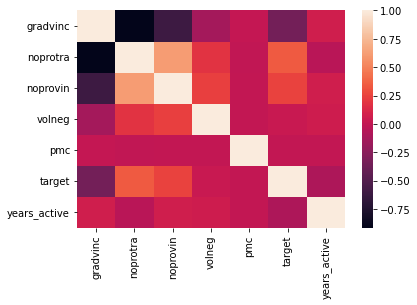

In [147]:
sns.heatmap(correlationmatrix.corr())

In [148]:
correlationmatrix.corr()

,gradvinc,noprotra,noprovin,volneg,pmc,target,years_active
gradvinc,1.000000,-0.917636,-0.603065,-0.138468,0.005698,-0.352781,0.068721
noprotra,-0.917636,1.000000,0.610556,0.176320,-0.005042,0.334297,-0.043146
noprovin,-0.603065,0.610556,1.000000,0.234081,-0.003411,0.250715,0.070611
volneg,-0.138468,0.176320,0.234081,1.000000,-0.000857,0.030636,0.052797
pmc,0.005698,-0.005042,-0.003411,-0.000857,1.000000,-0.002652,0.000792
target,-0.352781,0.334297,0.250715,0.030636,-0.002652,1.000000,-0.093736
years_active,0.068721,-0.043146,0.070611,0.052797,0.000792,-0.093736,1.000000


#### target: rebalancing?

In [136]:
# Balance of dataset: needs to be rebalanced because target value is highly skewed 
train_preprocessed3["target"].value_counts()

0    21628
1     3022
Name: target, dtype: int64

#### Final Datasets

with pmc median and with pmc dropped from dataset

In [105]:
train_preprocessed3

,gradvinc,noprotra,noprovin,volneg,pmc,target,Aragon,Asturias,Baleares,Canarias,...,Financial,Health,Manufacturing,Mining,OtherServices,RealEstate,Retail,Technical,Transportation,Water
0,1,4,4,86062.25,52.835,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0.00,52.835,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,4,4,174966.92,52.835,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0.00,75.730,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,4,1,2,97529.72,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24917,1,3,4,656367.19,7.920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24918,5,0,0,0.00,70.260,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24919,4,1,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_preprocessed3

,id,gradvinc,noprotra,noprovin,volneg,pmc,Aragon,Asturias,Baleares,Canarias,...,Health,Manufacturing,OtherServices,RealEstate,Retail,Technical,Transportation,Water,Agriculture,Mining
0,458072,5,0,0,0.00,54.62,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,516331,5,0,0,0.00,54.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3424,1,3,3,601225.40,54.62,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,880645,5,0,0,0.00,54.62,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,31272,4,1,4,115845.06,68.85,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,458428,5,0,0,0.00,54.62,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2848,192154,4,1,1,410332.50,41.47,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2849,213202,5,0,0,0.00,54.62,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2850,776938,5,0,0,90.77,54.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
final_train_df = train_preprocessed3[['years_active', 'noprotra', 'noprovin', 'volneg', 'pmc', 'Aragon',
       'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'CastillaLaMancha',
       'CastillaLeon', 'Cataluna', 'Extremadura', 'Galicia', 'LaRioja',
       'Madrid', 'Murcia', 'Navarra', 'PaisVasco', 'Valencia',
       'AdministrativeService', 'Agriculture', 'Arts', 'Communication',
       'Construction', 'Education', 'Energy', 'Financial', 'Health',
       'Manufacturing', 'Mining', 'OtherServices', 'RealEstate', 'Retail',
       'Technical', 'Transportation', 'Water', 'target']]

In [108]:
final_test_df = test_preprocessed3[['years_active', 'noprotra', 'noprovin', 'volneg', 'pmc', 'Aragon',
       'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'CastillaLaMancha',
       'CastillaLeon', 'Cataluna', 'Extremadura', 'Galicia', 'LaRioja',
       'Madrid', 'Murcia', 'Navarra', 'PaisVasco', 'Valencia',
       'AdministrativeService', 'Agriculture', 'Arts', 'Communication',
       'Construction', 'Education', 'Energy', 'Financial', 'Health',
       'Manufacturing', 'Mining', 'OtherServices', 'RealEstate', 'Retail',
       'Technical', 'Transportation', 'Water']]

In [109]:
final_train_df.reset_index(drop=True,inplace=True)
final_train_df

,years_active,noprotra,noprovin,volneg,pmc,Aragon,Asturias,Baleares,Canarias,Cantabria,...,Health,Manufacturing,Mining,OtherServices,RealEstate,Retail,Technical,Transportation,Water,target
0,6,4,4,86062.25,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,30,0,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0.00,52.835,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18,4,4,174966.92,52.835,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0.00,75.730,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24645,9,1,2,97529.72,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24646,5,3,4,656367.19,7.920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24647,31,0,0,0.00,70.260,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24648,14,1,0,0.00,52.835,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
final_test_df.reset_index(drop=True,inplace=True)
final_test_df

,years_active,noprotra,noprovin,volneg,pmc,Aragon,Asturias,Baleares,Canarias,Cantabria,...,Financial,Health,Manufacturing,Mining,OtherServices,RealEstate,Retail,Technical,Transportation,Water
0,15,0,0,0.00,54.62,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,0.00,54.62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,3,3,601225.40,54.62,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,0,0,0.00,54.62,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,44,1,4,115845.06,68.85,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,28,0,0,0.00,54.62,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2813,24,1,1,410332.50,41.47,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2814,18,0,0,0.00,54.62,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2815,21,0,0,90.77,54.62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***

## Modelling: Classification

#### Feature Scaling
Although scaling is not a requirement for classification it can improve the training performance. Therefore, the non-boolean values will be rescaled.

In [111]:
X_train = final_train_df.iloc[:, :-1].values
y_train = final_train_df.iloc[:, -1].values
X_test = final_test_df.iloc[:,:].values

print(X_train)
print(y_train)
print(X_test)
#print(y_test)

[[ 6.  4.  4. ...  0.  0.  0.]
 [30.  0.  0. ...  0.  0.  0.]
 [ 4.  0.  0. ...  0.  0.  0.]
 ...
 [31.  0.  0. ...  0.  0.  0.]
 [14.  1.  0. ...  0.  0.  0.]
 [31.  0.  0. ...  0.  0.  0.]]
[1 0 0 ... 0 0 0]
[[15.  0.  0. ...  0.  0.  0.]
 [24.  0.  0. ...  0.  0.  0.]
 [26.  3.  3. ...  0.  0.  0.]
 ...
 [18.  0.  0. ...  0.  0.  0.]
 [21.  0.  0. ...  0.  0.  0.]
 [13.  0.  0. ...  0.  0.  0.]]


In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:5] = sc.fit_transform(X_train[:,:5])
X_test[:,:5] = sc.transform(X_test[:,:5])
print(X_train)
print(X_test)

[[-1.18521635  1.62697131  2.1266748  ...  0.          0.
   0.        ]
 [ 0.91551586 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [-1.36027737 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 ...
 [ 1.00304637 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [-0.48497228 -0.2185983  -0.53669967 ...  0.          0.
   0.        ]
 [ 1.00304637 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]]
[[-0.39744177 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [ 0.39033281 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [ 0.56539382  1.01178144  1.46083118 ...  0.          0.
   0.        ]
 ...
 [-0.13485025 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [ 0.12774128 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]
 [-0.57250279 -0.83378817 -0.53669967 ...  0.          0.
   0.        ]]


#### Logit Regression

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\thaer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


87.96

In [143]:
coeff_df = pd.DataFrame(final_train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,noprovin,0.902925
18,PaisVasco,0.275422
13,Galicia,0.219747
9,CastillaLaMancha,0.215679
2,volneg,0.183036
7,Canarias,0.105018
15,Madrid,0.089271
6,Baleares,0.033882
14,LaRioja,-0.116338
5,Asturias,-0.155743


#### K-Nearest Neighbor (KNN)

In [115]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

91.99

#### Support Vector Machines (SVM)

In [116]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

88.21

#### Naive Bayes

In [117]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

40.68

#### Perceptron

In [118]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

81.78

#### Stochastic Gradient Descent

In [119]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

87.74

#### Kernel SVM

In [120]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\thaer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


87.98

#### Decision Tree

In [121]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.77

#### Random Forest

In [122]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.77

### Model Evaluation

In [123]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.77
8,Decision Tree,99.77
1,KNN,91.99
0,Support Vector Machines,88.21
7,Linear SVC,87.98
2,Logistic Regression,87.96
6,Stochastic Gradient Decent,87.74
5,Perceptron,81.78
4,Naive Bayes,40.68


***

## Prediction and Implementation

In [124]:
# prediction with Decision Tree Model
y_test_pred_DT = decision_tree.predict(X_test)
y_test_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
# prediction with Logistic Regression Model
y_test_pred_LG = logreg.predict(X_test)
y_test_pred_LG

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
# prediction with Support Vector Machines Model
y_test_pred_SVM = svc.predict(X_test)
y_test_pred_SVM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Submission as CSV

In [127]:
submission = pd.DataFrame({
        "id": test_preprocessed3["id"],
        "product_acquisition": y_test_pred_SVM
    })

In [132]:
submission[submission["product_acquisition"]==1]

,id,product_acquisition
89,43507,1
130,829408,1
158,769278,1
507,644524,1
973,805228,1
1170,709888,1
1260,806048,1
1814,640724,1
1865,465342,1
1941,489725,1


In [134]:
submission1 = pd.DataFrame({
        "id": test_preprocessed3["id"],
        "product_acquisition": y_test_pred_LG
    })

submission1[submission1["product_acquisition"]==1]

,id,product_acquisition
29,735027,1
30,384180,1
32,731845,1
47,826514,1
59,755670,1
...,...,...
2739,838599,1
2761,727701,1
2770,451655,1
2827,715845,1


In [135]:
submission2 = pd.DataFrame({
        "id": test_preprocessed3["id"],
        "product_acquisition": y_test_pred_DT
    })

submission2[submission2["product_acquisition"]==1]

,id,product_acquisition
5,482681,1
11,789334,1
13,129257,1
19,759847,1
22,322301,1
...,...,...
2831,802192,1
2835,6894,1
2839,146177,1
2844,66307,1


In [137]:
submission.to_csv("JPThoma_submission.csv",index=False) #SVM
submission1.to_csv("JPThoma_submission1.csv",index=False) #Logistic Regression
submission2.to_csv("JPThoma_submission2.csv",index=False) #Decision Tree

#### Implementation with Gradio 

In [173]:
#function to predict the input hours
def predict_acquisition(years_active,noprotra,noprovin,volneg,pmc,Aragon,
       Asturias, Baleares, Canarias, Cantabria, CastillaLaMancha,
       CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,
       Madrid, Murcia, Navarra, PaisVasco, Valencia,
       AdministrativeService, Agriculture, Arts, Communication,
       Construction, Education, Energy, Financial, Health,
       Manufacturing, Mining, OtherServices, RealEstate, Retail,
       Technical, Transportation, Water):
    
    pred_acquisition = logreg.predict([[years_active,noprotra,noprovin,volneg,pmc,Aragon,
       Asturias, Baleares, Canarias, Cantabria, CastillaLaMancha,
       CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,
       Madrid, Murcia, Navarra, PaisVasco, Valencia,
       AdministrativeService, Agriculture, Arts, Communication,
       Construction, Education, Energy, Financial, Health,
       Manufacturing, Mining, OtherServices, RealEstate, Retail,
       Technical, Transportation, Water]])
    
    
    #df = np.array(years_active,noprotra,noprovin,volneg,pmc,Aragon,
     #  Asturias, Baleares, Canarias, Cantabria, CastillaLaMancha,
     #  CastillaLeon,Cataluna,Extremadura,Galicia,LaRioja,
     #  Madrid, Murcia, Navarra, PaisVasco, Valencia,
      # AdministrativeService, Agriculture, Arts, Communication,
       #Construction, Education, Energy, Financial, Health,
       #Manufacturing, Mining, OtherServices, RealEstate, Retail,
       #Technical, Transportation, Water)
    #pred_acquisition = logreg.predict(df)
    return pred_acquisition[0]

In [174]:
predict_acquisition(10,5,146,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0)

1

In [175]:
input = [gr.inputs.Slider(0,200),gr.inputs.Slider(0,20),"number","number","number","checkbox","checkbox","checkbox",
         "checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox",
         "checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox",
         "checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox","checkbox"]
output = gr.outputs.Textbox(label='Predicted Acquisition')

In [176]:
gr.Interface( fn=predict_acquisition,
              inputs=input,
              outputs=output).launch(share=True);

Running on local URL:  http://127.0.0.1:7866/
Running on public URL: https://41968.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Socket exception: An existing connection was forcibly closed by the remote host (10054)


***

## Final Remarks

The workbook offers a solution to a classification supervised machine learning problem. The solution should provide answers to who would acquire products of the banking institution and who would not. After preprocessing the data different models were assesed. In the end, a logistic regression model was chosen and deployed as MVP application. 